In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv("data/ModelData.csv")
df

,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski_Drug-like,Lipinski_Not Drug-like,Veber_Drug-like,Veber_Not Drug-like,Ghose_Drug-like,Ghose_Not Drug-like
0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599,1,0,1,0,1,0
1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875,1,0,1,0,0,1
2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189,1,0,1,0,0,1
3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212,1,0,1,0,0,1
4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902,1,0,1,0,1,0
88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624,1,0,1,0,0,1
88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170,1,0,1,0,0,1
88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170,1,0,1,0,1,0


# GLM

### Model 1: Just molecular features

For the first model - only the 10 molecular features as predictors

#### Normalizing and Splitting Data

In [3]:
X_mol = df.filter(['MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS']).copy()
y = df['GPCR_act']

# normalizing X_mol
norm_X_mol = normalize(X_mol, axis = 0)

# Split data into training, validating, testing (80:10:10)
train_size=0.8

# This splits the training data (.8) and the remaining data
X_mol_train, X_mol_rem, y_train, y_rem = train_test_split(norm_X_mol, y, train_size=0.8)

# split the remaining data 50/50 for validation and testing
test_size = 0.5

# Splitting the remaining .2 of the data into test and validation
X_mol_valid, X_mol_test, y_valid, y_test = train_test_split(X_mol_rem, y_rem, test_size=0.5)

#### Creating the Model

In [4]:
# Making the GLM model with 10 molecular features as preditors (no drug-likeness)
reg = LinearRegression().fit(X_mol_train, y_train)

# returns the coefficient of determination, aka R-squared value
print(reg.score(X_mol_train,y_train))

# get the coefficients and intercept of our model
print(reg.coef_)
print(reg.intercept_)


0.18774601597970542
[ 66.35759945  76.26202711 -36.77327332  -8.11114851  28.94225207
  19.84406305 -58.10002833  10.15066935   6.74752625  -5.60529189]
0.06979180858541312


#### Plotting Model Performance

In [5]:
# Graph model predictions vs actual activity scores
preds=reg.predict(X_mol_valid)
len(preds)==len(y_valid)

# reshape arrays b/c god knows why
y_valid=np.array(y_valid).reshape(-1,1)
preds=preds.reshape(-1,1)

# finding the mean abs error
mae=[]
for i in range(0,len(preds)):
    mae.append(metrics.mean_absolute_error(y_valid[i],preds[i]))

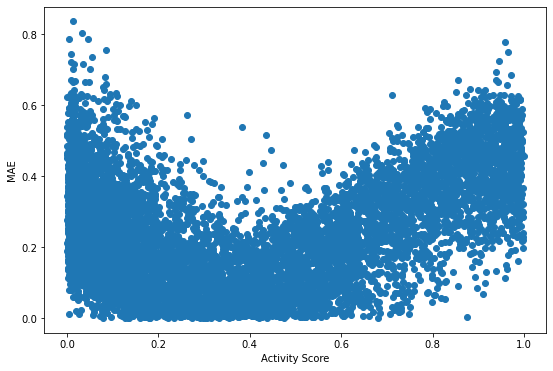

In [6]:
# Making a MAE plot
plt.figure(figsize=(9,6))
plt.xlabel("Activity Score")
plt.ylabel("MAE")
mae_plot=plt.scatter(x=y_valid,y=mae)

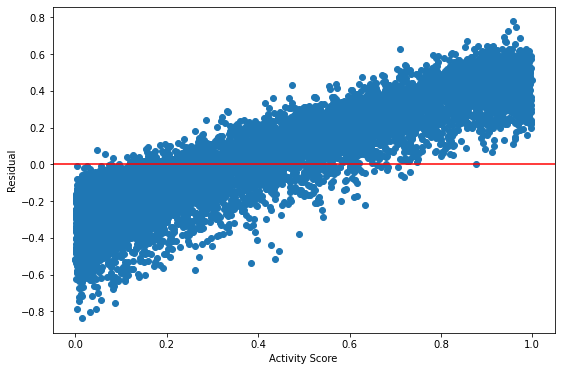

In [7]:
# Making a residual plot
resid=y_valid-preds
plt.figure(figsize=(9,6))
plt.axhline(y=0,color='red')
plt.xlabel("Activity Score")
plt.ylabel("Residual")
res_plot=plt.scatter(x=y_valid,y=resid)

### Model 2 : Just Drug-Likeness Features

#### Splitting Data

In [8]:
# Split data first
X_dl = df.drop(['SMILES', 'GPCR_act','MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS'], axis = 1)
y = df['GPCR_act']

# Split data into training, validating, testing (80:10:10)
train_size=0.8

# This splits the training data (.8) and the remaining data
X_dl_train, X_dl_rem, y_train, y_rem = train_test_split(X_dl, y, train_size=0.8)

# split the remaining data 50/50 for validation and testing
test_size = 0.5

# Splitting the remaining .2 of the data into test and validation
X_dl_valid, X_dl_test, y_valid, y_test = train_test_split(X_dl_rem, y_rem, test_size=0.5)

In [9]:
X_dl

,QED,Lipinski_Drug-like,Lipinski_Not Drug-like,Veber_Drug-like,Veber_Not Drug-like,Ghose_Drug-like,Ghose_Not Drug-like
0,0.545599,1,0,1,0,1,0
1,0.747875,1,0,1,0,0,1
2,0.621189,1,0,1,0,0,1
3,0.653212,1,0,1,0,0,1
4,0.617763,1,0,1,0,0,1
...,...,...,...,...,...,...,...
88873,0.720902,1,0,1,0,1,0
88874,0.471624,1,0,1,0,0,1
88875,0.770170,1,0,1,0,0,1
88876,0.733170,1,0,1,0,1,0


#### Creating the Model

In [10]:
# Making the GLM model with 10 molecular features as preditors (no drug-likeness)
reg2 = LinearRegression().fit(X_dl_train, y_train)

# returns the coefficient of determination, aka R-squared value
reg2.score(X_dl_train,y_train)

# get the coefficients and intercept of our model
reg2.coef_
reg2.intercept_

0.537282164324759

#### Plotting Model Performance

In [11]:
# Graph model predictions vs actual activity scores
preds2=reg2.predict(X_dl_valid)
len(preds)==len(y_valid)

# reshape arrays b/c god knows why
y_valid=np.array(y_valid).reshape(-1,1)
preds2=preds2.reshape(-1,1)

# finding the mean abs error
mae2=[]
for i in range(0,len(preds2)):
    mae2.append(metrics.mean_absolute_error(y_valid[i],preds2[i]))

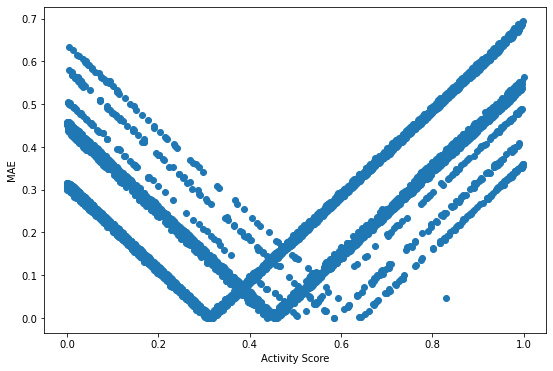

In [12]:
# Making a MAE plot
plt.figure(figsize=(9,6))
plt.xlabel("Activity Score")
plt.ylabel("MAE")
mae_plot=plt.scatter(x=y_valid,y=mae2)

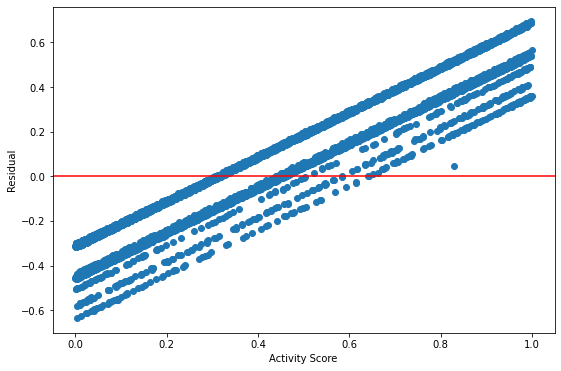

In [13]:
# making a residual plot
resid2=y_valid-preds2
plt.figure(figsize=(9,6))
plt.axhline(y=0,color='red')
plt.xlabel("Activity Score")
plt.ylabel("Residual")
res_plot=plt.scatter(x=y_valid,y=resid2)

# Random Forest
Built to predict the actual value of GPCR_act; includes dummy variables for drug-likeness

In [14]:
labels=np.array(df['GPCR_act'])

df_features=df.drop(['GPCR_act','SMILES'],axis=1)

features_list=list(df.columns)
features_list.remove('GPCR_act')
features_list.remove('SMILES')

features_arr=np.array(df_features)

In [15]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size = 0.25, random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (66658, 17)
Training Labels Shape: (66658,)
Testing Features Shape: (22220, 17)
Testing Labels Shape: (22220,)


In [17]:
# The baseline predictions are the historical averages
baseline_preds = labels.mean()
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.28


#### Uncomment if you want to run - takes a long time

In [18]:
# # Import the model we are using
# from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# # Train the model on training data
# rf.fit(train_features, train_labels);

In [19]:
# # Use the forest's predict method on the test data
# predictions = rf.predict(test_features)
# # Calculate the absolute errors
# errors = abs(predictions - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2))

In [20]:
# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / test_labels)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

In [21]:
# print("Model accuracy:",rf.score(test_features,test_labels) * 100,"%")

## Random Forest with Classifiers + No Dummy Variables

Continuous variables only; does not include dummy variables for drug-likeness

In [22]:
threshold=[]
for i in range(0,len(df)):
    if df.loc[i,'GPCR_act']>0.5000000000000:
        threshold.append("Active")
    elif df.loc[i,'GPCR_act']<0.5000000000000:
        threshold.append("Inactive")
    else: threshold.append(None)
       

In [23]:
df_class=df
df_class['GPCR_act']=threshold

In [24]:
class_labels=np.array(df_class['GPCR_act'])

df_class_features=df_class.filter(['MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS', 'QED'],axis=1)

class_features_list=list(df_class_features.columns)

class_features_arr=np.array(df_class_features)

In [25]:
# Split the data into training and testing sets
cl_train_features, cl_test_features, cl_train_labels, cl_test_labels = train_test_split(class_features_arr, class_labels, test_size = 0.25, random_state = 42)

In [26]:
print('Training Features Shape:', cl_train_features.shape)
print('Training Labels Shape:', cl_train_labels.shape)
print('Testing Features Shape:', cl_test_features.shape)
print('Testing Labels Shape:', cl_test_labels.shape)

Training Features Shape: (66658, 11)
Training Labels Shape: (66658,)
Testing Features Shape: (22220, 11)
Testing Labels Shape: (22220,)


#### Uncomment to run - takes a long time

In [27]:
# # Import the model we are using
# from sklearn.ensemble import RandomForestClassifier
# # Instantiate model with 1000 decision trees
# cl_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# # Train the model on training data
# cl_rf.fit(cl_train_features, cl_train_labels);

In [28]:
# # Use the forest's predict method on the test data
# cl_pred = cl_rf.predict(cl_test_features)

In [29]:
# print("Model accuracy:", metrics.accuracy_score(cl_test_labels, cl_pred) * 100, '%')

In [30]:
# # Get feature importance and create bar plot
# sorted_idx = cl_rf.feature_importances_.argsort()
# plt.barh(np.array(class_features_list)[sorted_idx], cl_rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

In [31]:
class_features_list

['MR',
 'ATOM',
 'MW',
 'ALOGP',
 'HBA',
 'HBD',
 'PSA',
 'ROTB',
 'AROM',
 'ALERTS',
 'QED']

In [32]:
# # Table of feature importances
# feat_importance = pd.DataFrame({'Variable': class_features_list,
#               'Importance': cl_rf.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop = True)
# feat_importance

In [33]:
# # Making a nice confusion matrix image
# cl_score = metrics.accuracy_score(cl_test_labels, cl_pred)
# cl_cm = metrics.confusion_matrix(cl_test_labels, cl_pred)
# plt.figure(figsize=(9,9))
# ax=sns.heatmap(cl_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# ax.xaxis.set_ticklabels(['Inactive','Active'])
# ax.yaxis.set_ticklabels(['Inactive','Active'])
# all_sample_title = 'Accuracy Score: {0}'.format(cl_score)
# plt.title(all_sample_title, size = 15);

In [34]:
# cl_test_labels

In [35]:
# # ROC curve - DONT RUN - TAKES A LONG ASS TIME
# from sklearn import svm
# clf = svm.SVC(random_state = 42)
# clf.fit(cl_train_features, cl_train_labels)
# svm.SVC(random_state = 42)
# metrics.plot_roc_curve(clf, cl_test_features, cl_test_labels) 
# plt.show()

### Visualizing the best decision tree from the random forest - Red Light

In [36]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# iris.target_names

In [37]:
# from sklearn.tree import plot_tree
# tree_viz=plot_tree(cl_rf.estimators_[0])

In [38]:
# from sklearn.tree import export_text
# tree_txt=export_text(cl_rf.estimators_[0],feature_names=class_features_list)
# print(tree_txt)

In [39]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(tree0, out_file='tree.dot', 
#                 feature_names = class_features_list,
#                 class_names = ["Active","Inactive"],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

## Random Forest with Classifier + Dummy Variables

Includes continuous features and dummy variables for drug-likeness

In [40]:
d_class_labels=np.array(df_class['GPCR_act'])

d_df_class_features=df_class.drop(['SMILES', 'GPCR_act'],axis=1)

d_class_features_list=list(d_df_class_features.columns)

d_class_features_arr=np.array(d_df_class_features)

In [41]:
# Split the data into training and testing sets
d_cl_train_features, d_cl_test_features, d_cl_train_labels, d_cl_test_labels = train_test_split(d_class_features_arr, d_class_labels, test_size = 0.25, random_state = 42)

In [42]:
print('Training Features Shape:', d_cl_train_features.shape)
print('Training Labels Shape:', d_cl_train_labels.shape)
print('Testing Features Shape:', d_cl_test_features.shape)
print('Testing Labels Shape:', d_cl_test_labels.shape)

Training Features Shape: (66658, 17)
Training Labels Shape: (66658,)
Testing Features Shape: (22220, 17)
Testing Labels Shape: (22220,)


In [43]:
# # Import the model we are using
# from sklearn.ensemble import RandomForestClassifier
# # Instantiate model with 1000 decision trees
# d_cl_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# # Train the model on training data
# d_cl_rf.fit(d_cl_train_features, d_cl_train_labels);

In [44]:
# # Use the forest's predict method on the test data
# d_cl_pred = d_cl_rf.predict(d_cl_test_features)

In [45]:
# print("Model accuracy:", metrics.accuracy_score(d_cl_test_labels, d_cl_pred) * 100, '%')

In [46]:
# # Get feature importance and create bar plot
# d_sorted_idx = d_cl_rf.feature_importances_.argsort()
# plt.barh(np.array(d_class_features_list)[d_sorted_idx], d_cl_rf.feature_importances_[d_sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

In [47]:
# # Table of feature importances
# d_feat_importance = pd.DataFrame({'Variable': d_class_features_list,
#               'Importance': d_cl_rf.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop = True)
# d_feat_importance

In [48]:
# # Confusion matrix
# d_cl_score = metrics.accuracy_score(d_cl_test_labels, d_cl_pred)
# d_cl_cm = metrics.confusion_matrix(d_cl_test_labels, d_cl_pred)
# plt.figure(figsize=(9,9))
# sns.heatmap(cl_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(d_cl_score)
# plt.title(all_sample_title, size = 15);

In [49]:
# # ROC curve
# d_clf = svm.SVC(random_state = 42)
# d_clf.fit(d_cl_train_features, d_cl_train_labels)
# SVC(random_state = 42)
# metrics.plot_roc_curve(d_clf, d_cl_test_features, d_cl_test_labels) 
# plt.show()

## Logistic Regression - No Dummy Variables

In [50]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(class_features_arr, class_labels, test_size = 0.25, random_state = 42)

In [51]:
class_labels

array(['Inactive', 'Inactive', 'Active', ..., 'Inactive', 'Inactive',
       'Inactive'], dtype=object)

In [52]:
logisticRegr=LogisticRegression()

In [53]:
# Fitting the model
logisticRegr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# Make predictions
predictions = logisticRegr.predict(x_test)

In [55]:
# Using score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print("Accuracy:",score)

Accuracy: 0.6915391539153916


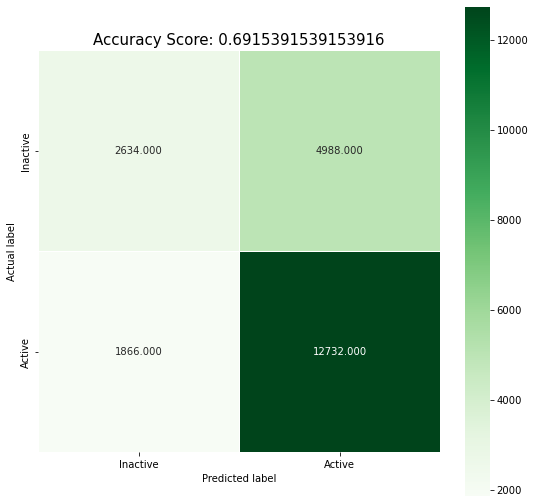

In [56]:
# Making a nice confusion matrix image
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
ax=sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.xaxis.set_ticklabels(['Inactive','Active'])
ax.yaxis.set_ticklabels(['Inactive','Active'])
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

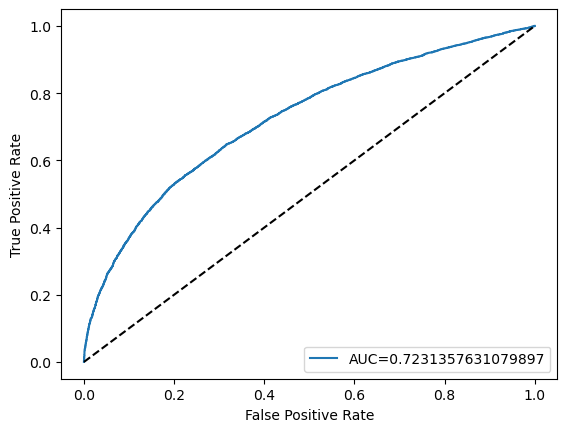

In [57]:
#define metrics
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="Inactive")
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.rcParams.update(plt.rcParamsDefault)
plt.plot(fpr,tpr,label="AUC="+str(auc))
x=np.linspace(0,1,10)
plt.plot(x,x,c='black',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Things to do 
- Create and evaluate 2 k-nearest neighbors classifier with k=3 and k=4
- Create visualisations based on our best model - Random forest with classifiers (no dummies)
- PCA

### Principle Component Analysis

We want to use all of our continuous features for the PCA

In [58]:
# we want all the continuous features: moelcular properties (10), QED, and GPCR_act
df=pd.read_csv("data/ModelData.csv")
pca_df=df.filter(['GPCR_act','MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS'],axis=1)

Now we scale and center the data for each feature

In [59]:
pca_df_scaled=preprocessing.scale(pca_df.drop(columns=["GPCR_act"]))

In [60]:
# After scaling, the mean for each column should be 0, and the std should be 1
check_cols=pd.DataFrame(pca_df_scaled)
print(check_cols[1].mean()) # basically 0 
print(check_cols[1].std()) # basically 1

1.954067097829542e-17
1.000005625736525


Fit the PCA object to our scaled data (this does all the math, i.e. calcualting loading scores and variation for each principle component. There will be 12 principle components because we are using 12 features.) The transform function generates the coordinates for the PCA graph based on our fitted PCA.


In [61]:
[str(x) for x in range(1,len(pca_df.iloc[0,]))]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [62]:
pca=PCA()
pca.fit(pca_df_scaled)
pca_data=pd.DataFrame(
    pca.transform(pca_df_scaled),
    columns=["PC"+str(x) for x in range(1,len(pca_df.iloc[0,]))]
)
pca_data['GPCR_act']=pca_df['GPCR_act']
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,GPCR_act
0,0.442944,-0.137881,0.026750,-1.447322,0.468678,0.758140,-0.394351,0.347501,-0.075175,-0.017630,0.251053
1,-1.563910,-0.220831,-1.134302,-0.242582,0.705307,0.485614,0.529718,0.382896,-0.012154,0.069200,0.129006
2,2.534259,-0.437203,-0.375013,-0.124912,1.434058,-1.599115,-0.259712,0.083214,-0.325655,0.078689,0.798935
3,-2.067819,-0.326187,-0.559767,0.442664,1.032309,-0.849087,0.395322,0.066164,-0.267078,-0.016465,0.034461
4,-1.124790,2.146208,-1.346315,0.318725,-0.295788,0.026123,0.005544,0.303411,0.010150,0.025925,0.064913
...,...,...,...,...,...,...,...,...,...,...,...
88873,-0.673747,-0.311223,-0.165925,0.381731,-0.258797,-1.732387,0.230883,-0.030531,-0.327542,0.016724,0.925964
88874,-0.340414,3.099459,-0.914768,1.232324,-0.351134,-0.134487,0.194108,0.308221,-0.059873,-0.014284,0.113655
88875,-0.892183,0.655481,-0.743035,-0.471329,-0.549466,0.167159,-0.036484,0.174523,-0.007272,0.099769,0.271177
88876,0.700633,0.783137,-1.542132,-0.429763,0.916533,0.957390,-0.009858,0.299845,0.248696,-0.085397,0.250121


In [63]:
pca_df

,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS
0,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0
1,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0
2,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0
3,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0
4,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
88873,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0
88874,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0
88875,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0
88876,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0


In [64]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC"+str(x) for x in range(1,len(pca_df.iloc[0,]))],
    index=pca_df.drop(columns=["GPCR_act"]).columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
MR,0.421091,-0.248910,-0.035664,0.080093,0.046199,-0.144525,0.222339,-0.098460,-0.413273,-0.707173
ATOM,0.444321,-0.146119,-0.054622,0.016048,0.160577,-0.127681,0.196073,0.094017,-0.472754,0.681997
MW,0.434856,-0.128631,0.008979,0.020567,0.199066,-0.270164,0.316436,0.025820,0.761447,0.025211
ALOGP,0.106857,-0.564574,0.080688,0.048207,-0.258104,-0.336986,-0.685842,0.052866,0.070783,0.051388
HBA,0.341534,0.358361,-0.010099,-0.080714,0.421616,0.082683,-0.490820,-0.568073,0.010201,-0.001938
HBD,0.217462,0.423735,-0.273474,0.159972,-0.722268,-0.282219,0.062008,-0.250484,0.015456,0.068083
PSA,0.326676,0.422846,-0.066236,-0.157649,0.027914,0.014157,-0.288250,0.758860,-0.013061,-0.158547
ROTB,0.283018,-0.012447,0.452414,0.607148,-0.186597,0.549751,-0.036423,0.042143,0.070899,0.035560
AROM,0.247041,-0.295151,-0.406368,-0.467539,-0.261337,0.617761,0.003498,-0.069095,0.114237,0.019165
ALERTS,0.113848,0.085793,0.734890,-0.588558,-0.250020,-0.075652,0.111507,-0.100684,-0.048033,0.010148


The below chunk creates the scree plot, which shows which principal components best explain our data. Looks like the first two PCs account for a decent amount of variance

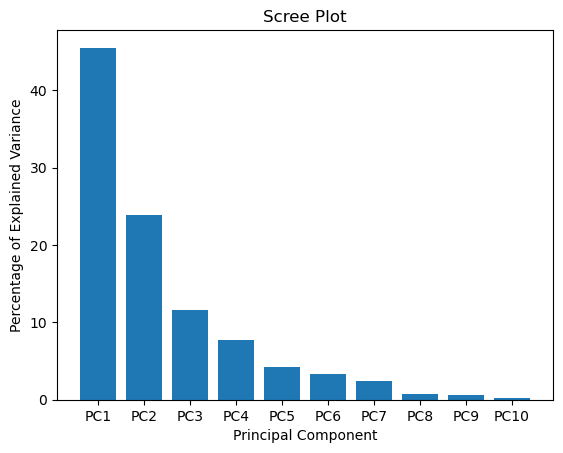

In [65]:
# calcualtes the percentage of variation in the data that each principle component accounts for
per_var=np.round(pca.explained_variance_ratio_ *100,decimals=1)

# creating labels for our scree plot
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

 IGNORE THE BELOW CELL - OBSOLETE

In [66]:
# # I just chose to name the indexs the practice useing string vectorization
# pca_df=pd.DataFrame(pca_data,index=["CHEM ID:"+str(x) for x in range(1,len(pca_data)+1)],columns=labels)
# pca_df.shape
# pca_data.shape

Probably want to color code this scatter plot based on GPCR activity greater or less than 0.5

In [67]:
pca_data.GPCR_act

0        0.251053
1        0.129006
2        0.798935
3        0.034461
4        0.064913
           ...   
88873    0.925964
88874    0.113655
88875    0.271177
88876    0.250121
88877    0.049145
Name: GPCR_act, Length: 88878, dtype: float64

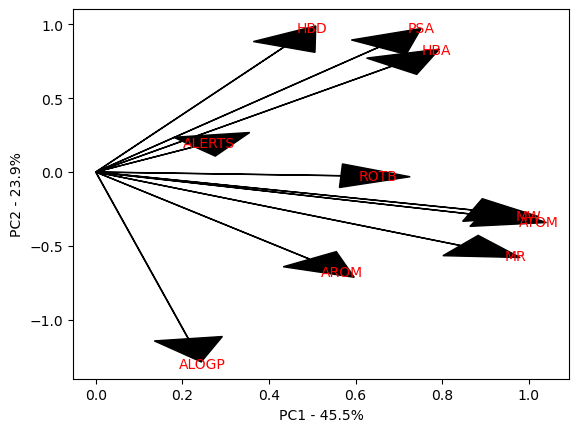

In [68]:
def loading_plot(
    coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5
):
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="red" if colors is None else colors[i],
                ha="center",
                va="center",
            )
            ax.xlabel('PC1 - {0}%'.format(per_var[0]))
            ax.ylabel('PC2 - {0}%'.format(per_var[1]))
loading_plot(loadings[["PC1", "PC2"]].values, loadings.index, scale=2, arrow_size=0.08)

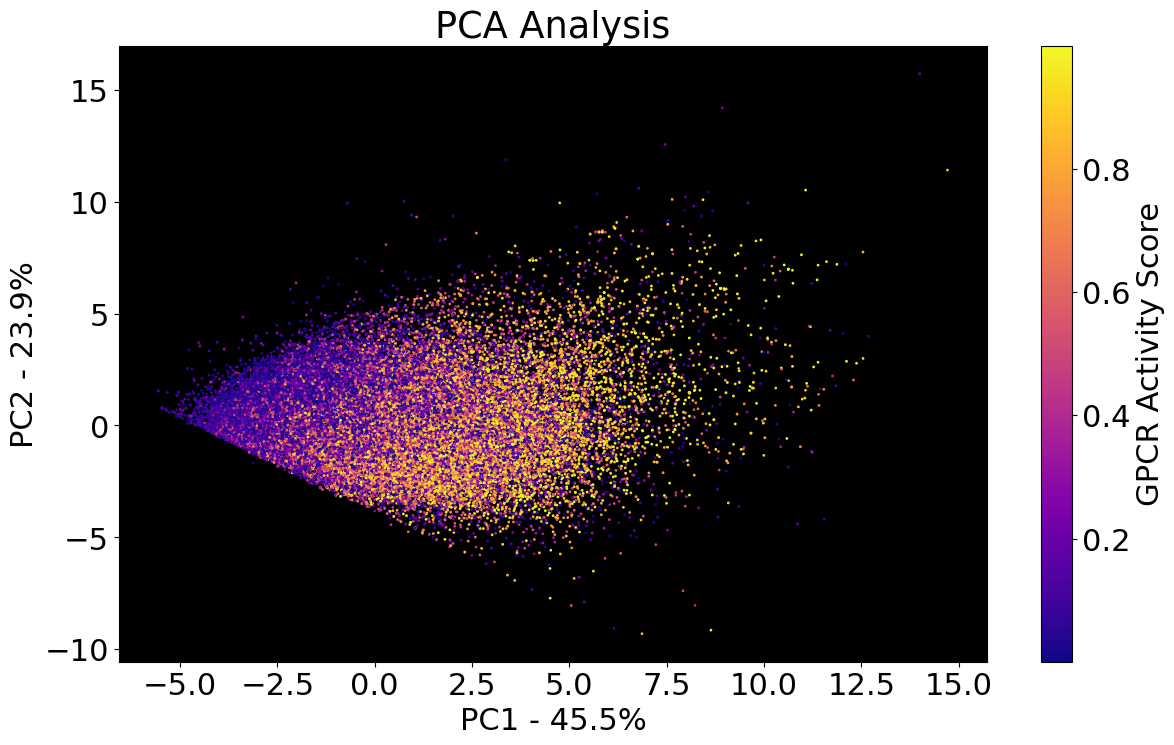

In [69]:
font = {'weight':'normal','size': 22}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(pca_data.PC1,pca_data.PC2,s=1,c=pca_data.GPCR_act,cmap='plasma')
plt.title('PCA Analysis')
plt.xlabel('PC1 - {0}%'.format(per_var[0])) 
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
cbar=plt.colorbar(label="GPCR Activity Score")
ax.set_facecolor('black')
plt.show()

# KNN Clustering

## K = 3

In [70]:
# import k neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# create KNN Classifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

# train the model using the training sets
knn_3.fit(cl_train_features, cl_train_labels)

# predict the response for test dataset
knn3_y_pred = knn.predict(cl_test_features)

# get model accuracy
print("Accuracy:", metrics.accuracy_score(cl_test_labels, knn3_y_pred) * 100 , '%')

NameError: name 'knn' is not defined

## K = 4

In [ ]:
# import k neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# create KNN Classifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

# train the model using the training sets
knn_3.fit(cl_train_features, cl_train_labels)

# predict the response for test dataset
knn3_y_pred = knn.predict(cl_test_features)

# get model accuracy
print("Accuracy:", metrics.accuracy_score(cl_test_labels, knn3_y_pred) * 100 , '%')